# Examen atelier Python TICV 2022-2023


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Il s’agit de partitionner le cerveau en 4 régions d’intérêt comme le montre la figure ci-dessous :
-	Le fond
-	Le liquide cérébrospinal
-	La substance grise
-	La substance blanche

![examen.jpg](attachment:examen.jpg)

## Segmentation d'images par seuillage

La première approche consistera à faire une segmentation par seuillage en utilisant l'histogramme pour définir des seuils.

1) Calculez l’histogramme de l’image « irm.jpg » et affichez-le avec la librairie matplotlib.

(939, 760)


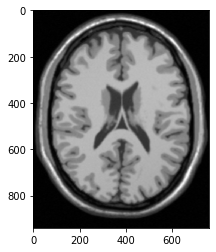

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
irm_image = cv.imread("/content/drive/MyDrive/examen/irm.jpg", 0)
plt.imshow(irm_image,cmap='gray')
print(irm_image.shape)

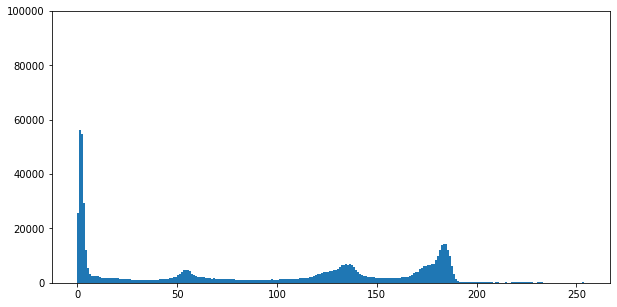

In [ ]:
import numpy as np
data_array = irm_image[:,:].reshape(-1,1)
min_data = np.array(data_array).min()
max_data = np.array(data_array).max()
plt.figure(figsize=(10, 5))
plt.hist(data_array,range(int(min_data), int(max_data)))
plt.ylim(0, 100000)
plt.show()

2)	A partir de l’histogramme de l’image définissez visuellement un seuil inférieur et un seuil supérieur d’appartenance à chaque région d’intérêt. Pour cela vous considérerez que chaque gaussienne forme une classe.

Ecrivez ici les seuils correspondant à chaque structure\
seuil de substance grise (105,150) \
seuil de liquide cérébrospinal (45,105)\
seuil de substance blanche (150,255)



---





3)	Effectuez une segmentation par seuillage des 4 régions d'intérêts et sauvegardez chaque région dans une image séparée où les pixels appartenant à la région prendront la valeur 255 et les pixels n'appartenant pas à la région prendront la valeur 0.

Text(0.5, 1.0, 'substance blanche')

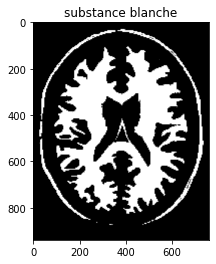

In [ ]:
csf_region = np.where(((irm_image > 45) & (irm_image < 105)), 1, 0)
gm_region = np.where(((irm_image > 105) & (irm_image < 150)), 1, 0)
wm_region =np.where(((irm_image > 150) & (irm_image < 255)), 1, 0)
plt.imshow(wm_region, cmap ="gray")
plt.title("substance blanche")

Text(0.5, 1.0, 'substance grise')

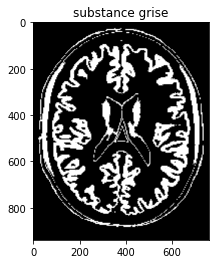

In [ ]:
plt.imshow(gm_region, cmap ="gray")
plt.title("substance grise")

Text(0.5, 1.0, 'liquide cérébrospinal')

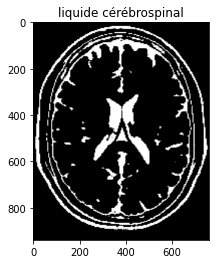

In [ ]:
plt.imshow(csf_region, cmap ="gray")
plt.title("liquide cérébrospinal")

4) Affichez les quatre images obtenues ainsi que l'image irm originale.

5) Calculez le coefficient de DICE pour chaque tissu (vous excluerez le fond). Vous utiliserez pour cela les masques fournis et qui représentent la vérité terrain (ground truth).

In [ ]:
gm_mask = cv.imread("/content/drive/MyDrive/examen/gm_mask.jpg",0)
wm_mask = cv.imread("/content/drive/MyDrive/examen/wm_mask.jpg",0)
csf_mask = cv.imread("/content/drive/MyDrive/examen/csf_mask.jpg",0)

In [ ]:
# Dice similarity function
def dice(pred, true):
    dice_coeff=0
    intersection = np.sum(pred) * 2.0
    dice_coeff = intersection / (np.sum(pred) + np.sum(true))
    dice_coeff = round(dice_coeff, 2)
    return dice_coeff


In [ ]:
gm_dice_score = dice(gm_region, gm_mask)
print ("Dice Similarity de la substance grise: {}".format(gm_dice_score))
wm_dice_score = dice(wm_region, wm_mask)
print ("Dice Similarity de la substance blanche: {}".format(wm_dice_score))
csf_dice_score = dice(csf_region, csf_mask)
print ("Dice Similarity de la liquide cérébrospinal: {}".format(csf_dice_score))

Dice Similarity de la substance grise: 0.01
Dice Similarity de la substance blanche: 0.01
Dice Similarity de la liquide cérébrospinal: 0.02


## Segmentation d'images par classification non supervisée

6) Utilisez la méthode Kmeans pour faire la segmentation du cerveau en 4 régions d'intérêt. Sauvegardez chaque région dans une image séparée où les pixels appartenant à la région prendront la valeur 255 et les pixels n'appartenant pas à la région prendront la valeur 0.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_array)

In [ ]:
kmeans.labels_.shape

(713640,)

In [ ]:
labels = kmeans.labels_

In [ ]:
print(labels.min())

0


In [ ]:
print(labels.max())

3


In [ ]:
labels_matrix = np.reshape(labels, irm_image.shape)

7) Affichez les quatre images obtenues (vous mettrez un titre pour chaque image pour désigner le nom de la région qu'elle représente)

In [ ]:
wm_image = np.where(labels_matrix[:,:] == 0, 1 , 0 )
gm_image  = np.where(labels_matrix[:,:] == 2, 1 , 0 )
csf_image  = np.where(labels_matrix[:,:] == 1, 1 , 0 )
background = np.where(labels_matrix[:,:] == 3, 1 , 0 )

Text(0.5, 1.0, 'substance blanche')

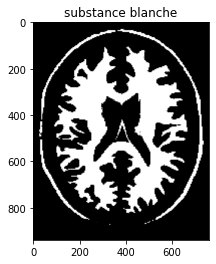

In [ ]:
plt.imshow(wm_image,cmap="gray")
plt.title("substance blanche")

Text(0.5, 1.0, 'liquide cérébrospinal')

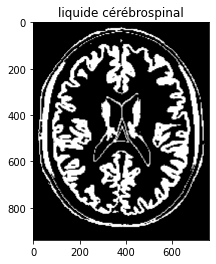

In [ ]:
plt.imshow(csf_image,cmap="gray")
plt.title("liquide cérébrospinal")

Text(0.5, 1.0, 'substance grise')

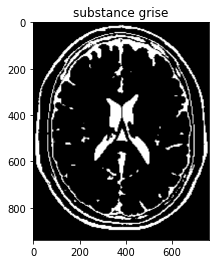

In [ ]:
plt.imshow(gm_image,cmap="gray")
plt.title("substance grise")

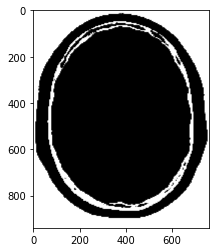

In [ ]:
plt.imshow(background,cmap="gray")

8) Calculez les nouveaux coefficients de DICE.

In [ ]:
kmeans_gm_dice_score = dice(gm_image, gm_mask)
print ("Dice Similarity de la substance grise: {}".format(kmeans_gm_dice_score))

Dice Similarity de la substance grise: 0.01


In [ ]:
kmeans_wm_dice_score = dice(wm_image, wm_mask)
print ("Dice Similarity de la substance blanche: {}".format(kmeans_wm_dice_score))

Dice Similarity de la substance blanche: 0.01


In [ ]:
kmeans_csf_dice_score = dice(csf_image, csf_mask)
print ("Dice Similarity de la liquide cérébrospinal: {}".format(kmeans_csf_dice_score))

Dice Similarity de la liquide cérébrospinal: 0.03


9) Si vous avez d'autres cerveaux à segmenter, quelle méthode choisirez vous? pourquoi?

Ecrivez votre réponse ici

si j'ai d'autres cerveaux à segmenter je choisis la méthode de segmentation automatique puisque visiblement les classes sont séparées mieux que le segmentation avec seuillage où les seuilles sont choisies manuellement et la tache sera penible si on a plusieurs échantillons et meme si les dices scores sont rapprochées, le dice score de la methode kmeans est 0.03 par rapport au dice score pour la substance grise de la methode de seuillage 0.02.\
0.02 < 0.03. kmeans est mieux que la méthode de seuillage et plus pratique